# Tight binding method

The tight binding method expands orbitals as a linear combination of atomic orbitals
(LCAO) - in the strict sense. AOs are not replaced by a fitted basis set.
The set of AOs is often minimal and the set of MOs/COs is reduced to a subset
around the chemical potential, e.g. only π orbitals in a polymer chain.
Frequently, only interactions with the first coordination shells are included.
Under some asumptions it is equivalent to Hückel's method.

We load linear algebra and plotting libraries first.

In [1]:
using LinearAlgebra
using Plots
using Measures: mm
using Parameters
import PyPlot
pyplt = PyPlot
mpl = PyPlot.matplotlib
pyplt.matplotlib.style.reload_library()
pyplt.matplotlib.style.use("sci")
mpl.use(backend="Qt5Agg")

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at pyplot.jl:21
└ @ Core /Users/daniel/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:21


To plot the density of states we need to broaden/smear the spectral lines.
The line shape observed is broadened by Doppler, ...

In [2]:
include("dos_broadening.jl")

lorentz_like (generic function with 1 method)

In this tutorial we will neglect all electron-electron interactions, focusing
only in kinetic electron energy and electron-external potential.
We talk about sites rather than atoms because we neglect spatial dimension.

-----------------------------------------------------------------------------------
## Chain of 2 sites

A chain of 2 sites, one with reference energy 0, and the other Δ higher
has a simple tight binding hamiltonian

In [3]:
function buildH2(Δ,t)
  # He⁺
  [ 0 t; t Δ]
end

buildH2 (generic function with 1 method)

where t is the hopping parameter.

In [4]:
# Two atomic orbitals at sites 1 and 2
t = 0; Δ = 2
println("A.1.  t = $t, Δ = $Δ")
H = buildH2(Δ,t)
es, vs = eigen(H)
for i in 1:length(es)
  println("Eigenstate with E = $(es[i]) and vector $(vs[i,:])")
end

A.1.  t = 0, Δ = 2
Eigenstate with E = 0.0 and vector [1.0, 0.0]
Eigenstate with E = 2.0 and vector [0.0, 1.0]


#### Example 1

In [5]:
t = 2; Δ = 0
println("A.2. t = $t, Δ = $Δ")
H = buildH2(Δ,t)
es, vs = eigen(H)
for i in 1:length(es)
  println("Eigenstate with E = $(es[i]) and vector $(vs[i,:])")
end

A.2. t = 2, Δ = 0
Eigenstate with E = -2.0 and vector [-0.7071067811865475, 0.7071067811865475]
Eigenstate with E = 2.0 and vector [0.7071067811865475, 0.7071067811865475]


#### Example 2

In [6]:
t = 1; Δ = 10
println("A.3.  t << Δ; t = $t, Δ = $Δ")
H = buildH2(Δ,t)
es, vs = eigen(H)
for i in 1:length(es)
  println("Eigenstate with E = $(es[i]) and vector $(vs[i,:])")
end

A.3.  t << Δ; t = 1, Δ = 10
Eigenstate with E = -0.09901951359278481 and vector [-0.9951333266680701, 0.09853761796664214]
Eigenstate with E = 10.099019513592786 and vector [0.09853761796664214, 0.9951333266680701]


-----------------------------------------------------------------------------------
## Three sites

Three sites (with open boundary) and site energies 0, Δ1, Δ2,
hoping constants t

In [7]:
function buildHchain3(Δ1,Δ2,t12,t23)
  [  0 t12   0;
   t12  Δ1 t23;
     0 t23  Δ2]
end

buildHchain3 (generic function with 1 method)

-----------------------------------------------------------------------------------
## 3 site ring

If the sites are forming a ring (periodic boundary conditions)
there are hoping matrix elements at the lower-left and upper-right
corners. The hamiltonian matrix is circulant rather than Toeplitz-like.

In [8]:
function buildHring3(Δ1,Δ2,t12,t13,t23)
  [  0 t12 t13;
   t12  Δ1 t23;
   t13 t23  Δ2]
end

buildHring3 (generic function with 1 method)

#### Example: 3 centers 1 electron

In [9]:
println("B.1. Δ₁ = 2, Δ₂ = 5, t₁₂ = 1, t₁₃ = 2, t₂₃ = 1")
H = buildHring3(2,5,1,2,1)
es, vs = eigen(H)
for i in 1:length(es)
  println("Eigenstate with E = $(es[i]) and vector $(vs[i,:])")
end

B.1. Δ₁ = 2, Δ₂ = 5, t₁₂ = 1, t₁₃ = 2, t₂₃ = 1
Eigenstate with E = -0.8460273610588649 and vector [-0.932296868605906, -0.12026011521212177, 0.34111589449450974]
Eigenstate with E = 1.7430864995096744 and vector [0.22929082064416684, -0.9258926649319276, 0.3002473856565238]
Eigenstate with E = 6.102940861549199 and vector [0.2797289194129681, 0.35813444083810214, 0.890781372688963]


-----------------------------------------------------------------------------------
## Large homoatomic ring

A large homoatomic ring  (circulant matrix)

In [10]:
function buildHring(t,N=1001)
  H = SymTridiagonal(zeros(N),t*ones(N-1))
  H = convert(Matrix,H)
  H[N,1] = H[1,N] = t
  H
end

buildHring (generic function with 2 methods)

#### Example

C.1. Ring with 1001 sites and t = 2.5


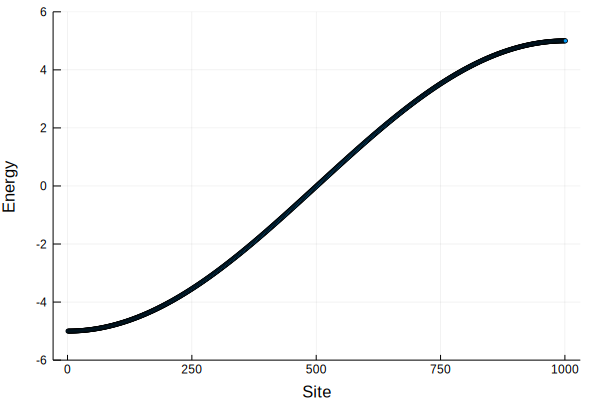

In [11]:
t = 2.5; N = 1001
println("C.1. Ring with $N sites and t = $t")
H = buildHring(t,N)
es, vs = eigen(H)
W = 2abs(t) # half-bandwith
band = scatter(es, xlabel="Site", ylabel="Energy",ms=2,leg=false,
               ylims=(-W-1,W+1))

In [12]:
e_dos, dos = dos_broadening(es)
dos = plot(dos,e_dos, ylabel="Energy", xlabel="DOS",leg=false,
            ylims=(-W-1,W+1))
l = @layout [ a b]
plot(band,dos,layout=l)
savefig("../figures/C.1_bandos_ring_t=$(t)_N=$(N)_E0=0.pdf")

-----------------------------------------------------------------------------------
## Large ring with an impurity

In [13]:
# If the ring has an impurity in the middle
function buildHring_impurity(t,Δ,N=1001)
  H = SymTridiagonal(zeros(N),t*ones(N-1))
  H = convert(Matrix,H)
  H[N,1] = H[1,N] = t
  H[N÷2,N÷2] = Δ
  H
end

buildHring_impurity (generic function with 2 methods)

In [14]:
t = 2.5; N = 1001; Δ = -2; impuritysite = N÷2
println("C.2. Ring with $N sites with t = $t, impurity at $impuritysite Δ = $Δ")
H = buildHring_impurity(t,Δ,N)
es, vs = eigen(H)
println("Impurity state with E = $(es[1])")
W = 2abs(t) # half-bandwith
band = scatter(es, xlabel="Site", ylabel="Energy",ms=2,leg=false,
               ylims=(-W-1,W+1))
e_dos, dos = dos_broadening(es)
dos = plot(dos,e_dos, ylabel="Energy", xlabel="DOS",leg=false,
     ylims=(-W-1,W+1))
l = @layout [ a b]
plot(band,dos,layout=l)
savefig("../figures/C.2_bandos_ring_t=$(t)_N=$(N)_E0=0_middleimpurity=$Δ.pdf")

C.2. Ring with 1001 sites with t = 2.5, impurity at 500 Δ = -2
Impurity state with E = -5.385164807134497


In [15]:
plot(vs[:,1].*vs[:,1],xlims=(490,510), label="Bound state",
     ylabel="Probability",xlabel="Site",
     title="Contribution of site orbitals to impurity state")
savefig("../figures/C.2_boundstate_ring_t=$(t)_N=$(N)_E0=0_middleimpurity=$Δ.pdf")

-----------------------------------------------------------------------------------
## Generic tight binding procedure

Generic function to solve tight-binding
hamiltonian, and plot bands, DOS, and PDOS.

In [16]:
function tight_binding(hamiltonianConstructor::Function,params,name)
   @unpack t, N, Δ, impuritysite = params
   if ismissing(Δ)
      println("$name with $N sites with t = $t")
   else
      println("$name with $N sites with t = $t, impurity at $impuritysite, Δ = $Δ")
   end
   H = hamiltonianConstructor(params...)
   es, vs = eigen(H)
   W = 2abs(t) # half-bandwith 1D
   emargin = 1.5
   println("Lowest energy state with E = $(es[1])", es[1]<-W ? " (surface state)" : "")
   band = scatter(es, xlabel="Site", ylabel="Energy",ms=2,leg=false,
                  ylims=(-W-emargin,W+emargin))

   e_dos, dos = dos_broadening(es)
   dos = plot(dos,e_dos, xlabel="DOS",leg=false,
              xlims=(0,1),ylims=(-W-emargin,W+emargin))

   e_pdos1, pdos1 = dos_broadening(es,vs[1,:].*vs[1,:])
   pdos = plot(pdos1,e_pdos1,label="Site 1", ylims=(-W-emargin,W+emargin))
   e_pdos500, pdos500 = dos_broadening(es,vs[N÷2,:].*vs[N÷2,:])
   pdos = plot!(pdos, pdos500, e_pdos500, label="Site $(N÷2)",
                xlims=(0,0.0013),
                xlabel="PDOS")

   l = @layout [ a b c]
   plot(band,dos,pdos, layout=l, size=(1200,400),
        left_margin=5mm,bottom_margin=5mm,
        right_margin=0mm,top_margin=0mm)
   if ismissing(impuritysite)
      savefig("../figures/$(name)_t=$(t)_N=$(N)_E0=0.pdf")
   else
      savefig("../figures/$(name)_t=$(t)_N=$(N)_E0=0_@$(impuritysite)=$Δ.pdf")
   end
end

tight_binding (generic function with 1 method)

-----------------------------------------------------------------------------------
# Large chain with an impurity state

A long chain considering only nearest-neighbors
hopings, all equal, with the possibility of having
an impurity in the middle

In [17]:
function buildHchain_tridiag(t,N=1001)
  H = SymTridiagonal(zeros(N),t*ones(N-1))
end
function buildHchain(t,N=1001,Δ=missing,impuritysite=missing)
  if ismissing(Δ)
     # homoatomic chain
     return buildHchain_tridiag(t,N)
  end
  H = SymTridiagonal(zeros(N),t*ones(N-1))
  H = convert(Matrix,H)
  H[impuritysite,impuritysite] = Δ
  H
end

buildHchain (generic function with 4 methods)

We will explore Schokley/Tamm surface states

#### Example D.1: Chain without impurity

In [18]:
name = "D.1. Chain"
params = (t=2.5,N=1001,Δ=missing,impuritysite=missing)
tight_binding(buildHchain,params,name)

D.1. Chain with 1001 sites with t = 2.5
Lowest energy state with E = -4.999975424409872


#### Example D.2: Impurity in the middle

In [19]:
name = "D.2. Chain"
params = (t=2.5,N=1001,Δ=-2,impuritysite=500)
tight_binding(buildHchain,params,name)

D.2. Chain with 1001 sites with t = 2.5, impurity at 500, Δ = -2
Lowest energy state with E = -5.385164807134504 (surface state)


#### Example D.3: Impurity at the surface

In [20]:
name = "D.3. Chain"
params = (t=2.5,N=1001,Δ=-2,impuritysite=1)
tight_binding(buildHchain,params,name)

D.3. Chain with 1001 sites with t = 2.5, impurity at 1, Δ = -2
Lowest energy state with E = -4.99997561943913


#### Example D.4: Impurity at the surface, strong impurity

In [21]:
name = "D.4. Chain"
params = (t=2.5,N=1001,Δ=-4,impuritysite=1)
tight_binding(buildHchain,params,name)

D.4. Chain with 1001 sites with t = 2.5, impurity at 1, Δ = -4
Lowest energy state with E = -5.562499999999997 (surface state)


Finite effects are also interesting

#### Example E.1: Finite chain

In [22]:
name = "E.1. Finite Chain"
params = (t=2.5,N=9,Δ=-2,impuritysite=1)
tight_binding(buildHchain,params,name)

E.1. Finite Chain with 9 sites with t = 2.5, impurity at 1, Δ = -2
Lowest energy state with E = -4.853039707148026


#### Example E.2: Finite chain

In [23]:
name = "E.2. Finite Chain"
params = (t=2.5,N=9,Δ=-4,impuritysite=1)
tight_binding(buildHchain,params,name)

E.2. Finite Chain with 9 sites with t = 2.5, impurity at 1, Δ = -4
Lowest energy state with E = -5.562184783729448 (surface state)


-----------------------------------------------------------------------------------
## 2 sites per cell with s orbitals

In [24]:
function tight_binding_1D_2sites(a,Δ₁₂,t)
   # 1D chain/ring with 2 sites per unit cell, s orbitals
   b = 2a # unit cell with two sites
   ε1 = 0 # without loss of generality energy reference at 0
   ε2 = Δ₁₂

   kpath = range(-π/b,stop=π/b,length=100)
   Enk = zeros(2,length(kpath))

   for (ik,k) in enumerate(kpath)
      H_k = [     ε1        2t*cos(k*a);
              2t*cos(k*a)       ε2      ]
      e, vs = eigen(H_k)
      Enk[:,ik] = e
   end

   plot(kpath/π,[Enk[1,:], Enk[2,:]],
        label=["Ground state" "Excited state"],
        xlabel="k pi/a", ylabel="Energy",
        leg = :inside,
       )
   savefig("../figures/1d_2sites.pdf")
end

tight_binding_1D_2sites (generic function with 1 method)

#### Example

In [25]:
tight_binding_1D_2sites(1,2,2) # a, Δ₁₂, t

-----------------------------------------------------------------------------------
## 2 sites per cell with s and p orbitals

In [26]:
function tight_binding_1D_2sites_sp_orbs(a,Δ₁₂,t)
   # 1D chain/ring with 2 sites per unit cell, sp orbitals
   # Redefined ψpk = i 1/√N * ∑R₂ exp(ikR₂) ϕp(r-R₂) to have a real matrix
   b = 2a # unit cell with two sites
   εs = Δ₁₂
   εp = 0 # without loss of generality energy reference at 0

   kpath = range(-π/b,stop=π/b,length=100)
   Enk = zeros(2,length(kpath))

   for (ik,k) in enumerate(kpath)
      H_k = [      εs        -2t*sin(k*a);
              -2t*sin(k*a)        εp      ]
      e, vs = eigen(H_k)
      Enk[:,ik] = e
   end

   plot(kpath/π,[Enk[1,:], Enk[2,:]],
        label=["p state" "s state"],
        xlabel="k pi/a", ylabel="Energy",
        leg = :right,
       )
   savefig("../figures/1d_2sites_sp_orbs.pdf")
end

tight_binding_1D_2sites_sp_orbs (generic function with 1 method)

In [27]:
tight_binding_1D_2sites_sp_orbs(1,2,2) # a, Δ₁₂, t

-----------------------------------------------------------------------------------
## 2D

In [28]:
function tight_binding_2D(a,b,Δ₁₂,ta,tb)
   # 2D rectangular lattice with 1 site per unit cell, s orbitals
   @assert a == b # does not handle rectangular with analytic formula
   @assert Δ₁₂ == 0 # does not handle ≠ ε with analytic formula
   ε1 = 0 # without loss of generality energy reference at 0
   ε2 = Δ₁₂

   Hamiltonian(kx,ky) = [               ε1               2ta*cos(kx*a) + 2tb*cos(ky*b);
                         2ta*cos(kx*a) + 2tb*cos(ky*b)                  ε2            ]

   # ............................
   # Band plot
   nkpts = 100
   kpath = zeros(2,3nkpts)
   kpath[1,  1:nkpts]  = range(0,stop=π/a,length=nkpts)
   kpath[2,  1:nkpts] .= 0
   #
   kpath[1,(nkpts+1):2nkpts] .= π/a
   kpath[2,(nkpts+1):2nkpts]  = range(0,stop=π/b,length=nkpts)
   #
   kpath[1,(2nkpts+1):3nkpts]  = range(π/a,stop=0,length=nkpts)
   kpath[2,(2nkpts+1):3nkpts]  = range(π/b,stop=0,length=nkpts)
   Enk = zeros(2,3nkpts)

   for ik in 1:3nkpts
      kx = kpath[1,ik]
      ky = kpath[2,ik]
      H_k = Hamiltonian(kx,ky)
      e, vs = eigen(H_k)
      #Enk[:,ik] = e # FIXME
      Enk[1,ik] = ε1 + ε2 - 2abs(ta)*cos(kx*a) - 2abs(tb)*cos(ky*b) # analytic formula
   end

   #plot(1:3nkpts,[Enk[1,:],Enk[2,:]],
   #plot(1:3nkpts,Enk[1,:],
   #     label=["Ground state" "Excited state"],
   #     xlabel="kpath/pi", ylabel="Energy",
   #     leg = :inside,
   #    )
   #savefig("2d_1sites.pdf")
   fig = pyplt.figure()
   fig.set_dpi(260)
   ax = fig.add_subplot(111)
   ax.plot(1:3nkpts,Enk[1,:], label="Ground state")
   ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
   ax.set_xticklabels(["d","(0,0)T", "(1,0)T", "(1,1)T", "(0,0)T"])
   ax.set_xlim(0,3nkpts)
   ax.set_ylim(-2abs(ta)-2abs(tb),2abs(ta)+2abs(tb))
   ax.grid(true)
   ax.set_xlabel("(kx,ky)T pi/a")
   ax.set_ylabel("Energy")
   fig.tight_layout(pad=0.1)
   pyplt.savefig("../figures/2d_1sites.pdf")

   # ..........................................................
   # BZ integration
   nmesh = 101
   Enk = zeros(2,nmesh,nmesh)
   kxrange = range(-π/a,stop=π/a,length=nmesh)
   kyrange = range(-π/b,stop=π/b,length=nmesh)
   for (ikx,kx) in enumerate(kxrange), 
       (iky,ky) in enumerate(kyrange)
      H_k = Hamiltonian(kx,ky)
      #e, vs = eigen(H_k) # FIXME
      ##_,_,eschur = schur(H_k)
      Enk[1,ikx,iky] = ε1 + ε2 - 2abs(ta)*cos(kx*a) - 2abs(tb)*cos(ky*b) # analytic result a = b; ...
      #if abs(kx) + abs(ky) < pi/a
      #   Enk[:,ikx,iky] = e
      #else
      #   Enk[:,ikx,iky] = reverse(e)
      #end
      #isapprox(e[1] , ε1 + ε2 + 2ta*cos(kx*a) + 2tb*cos(ky*b), atol=1e-1) || error("wrong eigenvalue $(e[1]) ≠ $(ε1 + ε2 + 2ta*cos(kx*a) + 2tb*cos(ky*b))")
      #@show kx, ky
      #println(e[1]," ", e[2], " ", ε1 + ε2 - 2abs(ta)*cos(kx*a) - 2abs(tb)*cos(ky*b))
      #e[1], e[2] = e[2], e[1]
   end

   fig = pyplt.figure()
   fig.set_dpi(260)
   ax = fig.add_subplot(111)
   ax.set_aspect("equal")
   cont = ax.contourf(kxrange./π,kyrange./π,Enk[1,:,:], levels=15)
   #cont = ax.plot_surface(kxrange./π,kyrange./π,Enk[1,:,:])
   #cont = ax.imshow(Enk[1,:,:],extent=(-1,1,-1,1))
   # Set axis labels
   ax.set_xlabel("kx pi/a")
   ax.set_ylabel("ky pi/b")
   pyplt.colorbar(cont,format="%+3.1f")
   fig.tight_layout(pad=0.1)
   pyplt.savefig("../figures/2d_1sites_contour.pdf")
end

tight_binding_2D (generic function with 1 method)

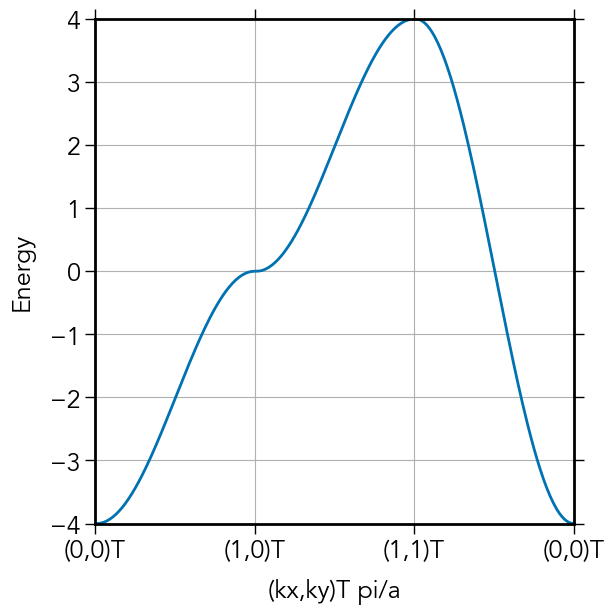

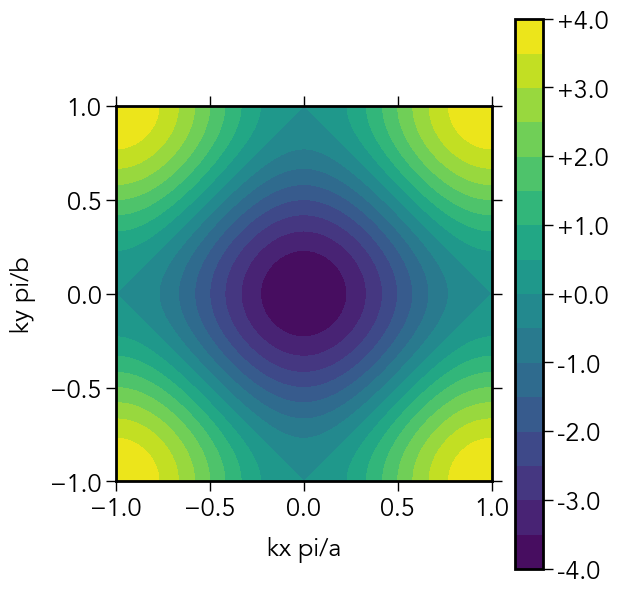

In [29]:
tight_binding_2D(1,1,0,1,1) # a, b, Δ₁₂, ta, tb
#tight_binding_2D(10,5,2,0.5,1) # a, b, Δ₁₂, ta, tb